# Limpeza da base Credit Card

## Objetivo do Notebook
Criar a base input para modelagem

## Dataset
Default of Credit Card Clients Dataset\
https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset

# Bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Tratamento de variaveis (pré processamento)

In [48]:
df = pd.read_csv('../datasets/raw/kaggle_credit_card/UCI_Credit_Card.csv', delimiter=',')
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


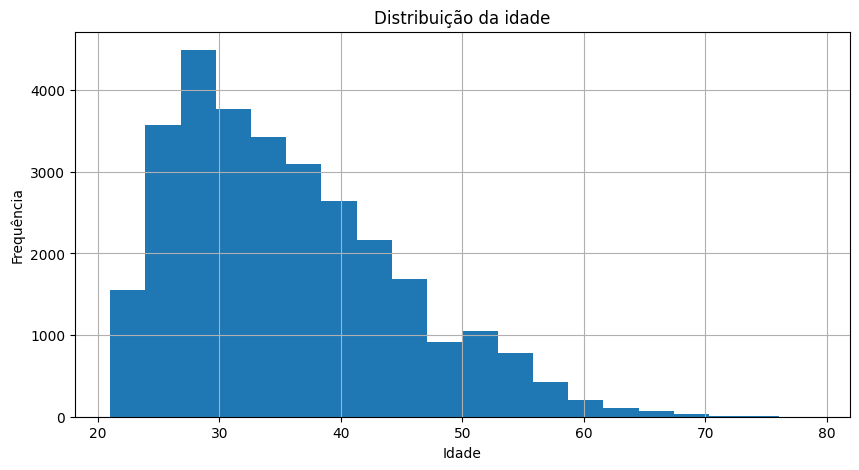

In [49]:
plt.figure(figsize=(10, 5))
df['AGE'].hist(bins=20)
plt.title('Distribuição da idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

In [50]:
# Renomear target e garantir que 1 seja a classe minoritária
df.rename(columns={'default.payment.next.month': 'target'}, inplace=True)
classe_counts = df['target'].value_counts()
print("Distribuição original da variável target:\n", classe_counts)

if classe_counts[1] > classe_counts[0]:
    df['target'] = 1 - df['target']
    print("Target invertido para garantir que 1 seja a classe minoritária.\n")
else:
    print("Target já está com 1 como classe minoritária.\n")

# Categorizar a variável AGE em faixas etárias
def criar_faixa_idade(idade):
    if idade < 18:
        return "Menor que 18"
    elif idade <= 25:
        return "18-25"
    elif idade <= 35:
        return "26-35"
    elif idade <= 50:
        return "36-50"
    else:
        return "51+"

df['sensitive_faixa_idade'] = df['AGE'].apply(criar_faixa_idade).astype('category')
print("Distribuição das faixas etárias:\n", df['sensitive_faixa_idade'].value_counts(),"\n")

# Excluir colunas não utilizadas
df.drop(columns=['AGE', 'ID'], inplace=True)

# Renomear e transformar colunas categóricas
df.rename(columns={'SEX': 'sensitive_sexo'}, inplace=True)
df['sensitive_sexo'] = df['sensitive_sexo'].map({1: 'male', 2: 'female'}).astype('category')
df['MARRIAGE'] = df['MARRIAGE'].map({1: 'married', 2: 'single', 3:'others'}).astype('category')

# Tratar variavel Education
education_map = {
    1: 'graduate_school',
    2: 'university',
    3: 'high_school',
    4: 'others',
    5: 'unknown',
    6: 'unknown',
    0: 'unknown'
}
# Aplicar mapeamento e converter em categoria
df['EDUCATION'] = df['EDUCATION'].map(education_map).astype('category')
print("Distribuição da variável Education:\n", df['EDUCATION'].value_counts())

# Renomear variáveis ordinais
variaveis_ordinais = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
df.rename(columns={col: f"ordinal_{col}" for col in variaveis_ordinais}, inplace=True)
df.to_csv('../datasets/processed/kaggle_credit_card.csv', index=False)

df

Distribuição original da variável target:
 target
0    23364
1     6636
Name: count, dtype: int64
Target já está com 1 como classe minoritária.

Distribuição das faixas etárias:
 sensitive_faixa_idade
26-35    12938
36-50    10922
18-25     3871
51+       2269
Name: count, dtype: int64 

Distribuição da variável Education:
 EDUCATION
university         14030
graduate_school    10585
high_school         4917
unknown              345
others               123
Name: count, dtype: int64


,LIMIT_BAL,sensitive_sexo,EDUCATION,MARRIAGE,ordinal_PAY_0,ordinal_PAY_2,ordinal_PAY_3,ordinal_PAY_4,ordinal_PAY_5,ordinal_PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,target,sensitive_faixa_idade
0,20000.0,female,university,married,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,18-25
1,120000.0,female,university,single,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,26-35
2,90000.0,female,university,single,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,26-35
3,50000.0,female,university,married,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,36-50
4,50000.0,male,university,married,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,51+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,male,high_school,married,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0,36-50
29996,150000.0,male,high_school,single,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0,36-50
29997,30000.0,male,university,single,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1,36-50
29998,80000.0,male,high_school,married,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1,36-50
